In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Importing needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import geopandas

import warnings
warnings.filterwarnings("ignore")

import logging

logging.basicConfig(filename='log.txt',level=logging.DEBUG, format='%(asctime)s %(message)s')

# ***importing the dataset***

In [ ]:
#Importing the dataset
raw_data = pd.read_csv('./masternew.csv')

## ***check for any null values.***

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [ ]:
#Checking for any null values
raw_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

- The HDI for year column has 2/3 of its data as missing values, unfortunatly, we'll have to drop this column. The country-year column isn't that useful also. We'll discard it too.

In [ ]:
#Getting the names of the columns we have
print(raw_data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [ ]:
#Removing the HDI and country-year columns
no_na_data = raw_data[['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation']]
no_na_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1993,male,15-24 years,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1993,male,35-54 years,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1993,female,15-24 years,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1993,male,75+ years,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1993,male,25-34 years,9,274300,3.28,"2,15,66,24,900",796,Boomers


- Let's now check for any outliers or wrong entires through the Pandas describe method that gives us a small summary of our numerical features. This will help us detect any visible anomalies in our data.

In [ ]:
#Describing our dataset
no_na_data.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2007.258375,242.576995,1.844794e+06,12.816097,16866.477354
std,8.469055,902.052970,3.911779e+06,18.961511,18887.566288
min,1991.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,2001.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2008.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2014.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2022.000000,22338.000000,4.380521e+07,224.970000,126352.000000


- All the features seem to be in good order, except the suicides rates variables. It is very odd to have 0 suicides in a year! Let's check the values for which we have no suicides in a given year.

In [ ]:
#Checking the entries where suicides_no = 0
no_na_data[no_na_data['suicides_no']==0]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
9,Albania,1993,female,5-14 years,0,311000,0.0,"2,15,66,24,900",796,Generation X
10,Albania,1993,female,55-74 years,0,144600,0.0,"2,15,66,24,900",796,G.I. Generation
11,Albania,1993,male,5-14 years,0,338200,0.0,"2,15,66,24,900",796,Generation X
22,Albania,1994,female,5-14 years,0,317200,0.0,"2,12,60,00,000",769,Generation X
23,Albania,1994,male,5-14 years,0,345000,0.0,"2,12,60,00,000",769,Generation X
...,...,...,...,...,...,...,...,...,...,...
27363,Uruguay,2004,female,5-14 years,0,262973,0.0,"25,38,59,28,198",8420,Millenials
27459,Uruguay,2012,female,5-14 years,0,260187,0.0,"19,57,94,57,966",6362,Millenials
27471,Uruguay,2013,female,5-14 years,0,257931,0.0,"23,41,05,72,634",7581,Generation Z
27495,Uruguay,2015,male,5-14 years,0,263516,0.0,"31,66,09,11,277",10166,Generation Z


- The entries that had 0 values didn't represent the whole country in a given year, they actually represented a specific age category. So we are good to go, it's safe to say that our data is ready and we can work with it.

In [ ]:
#Creating a new dataframe 'clean_data' to work with
clean_data = no_na_data.copy()

## Exploratory Data Analysis:

In [ ]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Now, let's group the suicide data by country and calculate the aggregated number of suicides per 100k population for each country.

In [ ]:
# Group the data by country and find the sum of suicides number and population
suicide_by_country_df = raw_data.groupby('country')[['suicides_no', 'population']].sum().reset_index()

# Calculate suicides/100k pop
suicide_by_country_df['suicides/100k pop'] = 100000 * suicide_by_country_df['suicides_no'] / suicide_by_country_df['population']

# Sort the rows by suicides/100k pop from highest to lowest
suicide_by_country_df.sort_values(by='suicides/100k pop', ascending=False, inplace=True)
suicide_by_country_df.head()

,country,suicides_no,population,suicides/100k pop
6,Austria,152,156535,97.102884
53,Lithuania,28039,68085210,41.182219
76,Russian Federation,1209742,3690802620,32.777207
88,Sri Lanka,55641,182525626,30.483939
11,Belarus,59892,197372292,30.344685


Observation:
    
    We can merge world and suicide_by_country_df to plot the suicide incidence of each country. Before that, we need to modify some country names in world as there are discrepancies between the two dataframes.

In [ ]:
# Modify country name due to a difference in two dataframes
country_match = {'Russia': 'Russian Federation', 'United States of America': 'United States', 'South Korea': 'Republic of Korea',
                 'Bosnia and Herz.': 'Bosnia and Herzegovina'}
world['name'].replace(country_match, inplace=True)

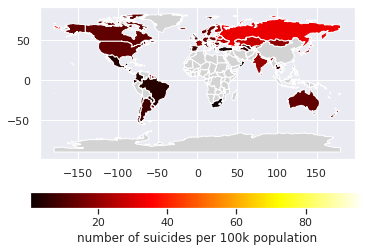

In [ ]:
# Merge the two dataframes together
table = world.merge(suicide_by_country_df, how='left', left_on=['name'], right_on=['country'])

# Create the map
table.plot(column='suicides/100k pop',
           cmap='hot',
           legend=True,
           legend_kwds={'label': 'number of suicides per 100k population',
                        'orientation': 'horizontal'},
           missing_kwds={'color': 'lightgrey'});

Observation:

    From the map, the suicide incidence is higher in Russian Federation and some European countries, compared to Australia and America.

    We can also see that we do not have suicide data for most of the Asia and Africa countries, and our machine learning model will not generalize well to these countries.

## ***Suicide Over Time***

In [ ]:
Sgen = raw_data[raw_data.generation == 'Silent']

In [ ]:
## Suicides number by year (high to low)
year_suicides = raw_data.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Greens', subset=['suicides_no'])

,year,suicides_no
14,2005,256119
17,2008,256095
18,2009,256079
15,2006,255838
16,2007,250658
13,2004,249597
11,2002,246725
10,2001,243544
24,2015,243487
19,2010,240861


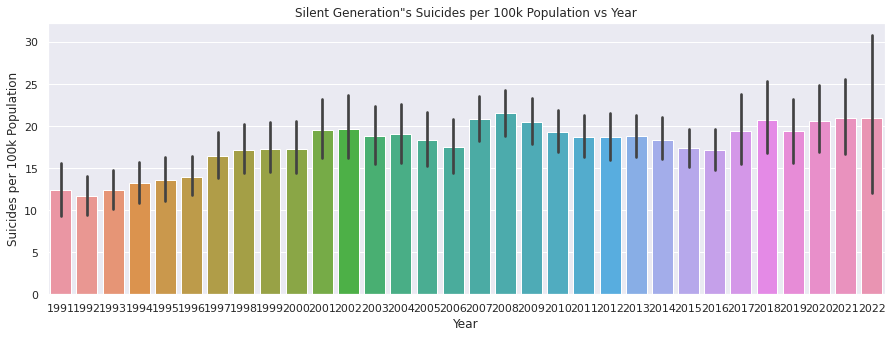

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(Sgen.year,Sgen['suicides/100k pop'])
plt.title('Silent Generation"s Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

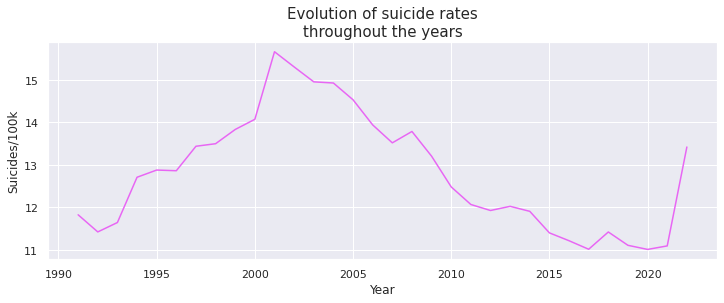

In [ ]:
#Grouping our data by year
gp_year_data = clean_data.groupby('year', as_index=False).mean()

#Plotting the suicides rates by years
fig, ax = plt.subplots(figsize=(12,4))
sns.lineplot(x='year', y='suicides/100k pop', color=sns.husl_palette(6)[5], data=gp_year_data, ax=ax)
plt.xlabel('Year')
plt.ylabel('Suicides/100k')
plt.title('Evolution of suicide rates\nthroughout the years', size=15)
plt.show()

Observation:

- From the line plot above we can see that the suicide rates kept oscilating between 11 and 16 suicide per 100,000 person. In 1995 the suicde rates peaked reaching almost 16 suicide per 100,000 individual. It started dropping afterwards to reach a minimum of 11 suicide per 100,000 individual in 2010 and 2014. Let's check if we can determine which countries have the highest suicide rates.

## ***suicides analysis ov country***

In [ ]:
## Number of suicides in 1985
year_1985 = raw_data[(raw_data['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicides_no'])

,country,suicides_no


In [ ]:
## Number of suicides in 2016
year_1985 = raw_data[(raw_data['year'] == 2016)]
year_1985 = year_1985.groupby('country')[['suicides_no']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicides_no', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicides_no'])

,country,suicides_no
85,United States,38362
65,Russian Federation,33356
40,Japan,29411
63,Republic of Korea,15558
26,France,10379
28,Germany,10030
11,Brazil,9429
82,Ukraine,9089
59,Poland,6357
50,Mexico,4858


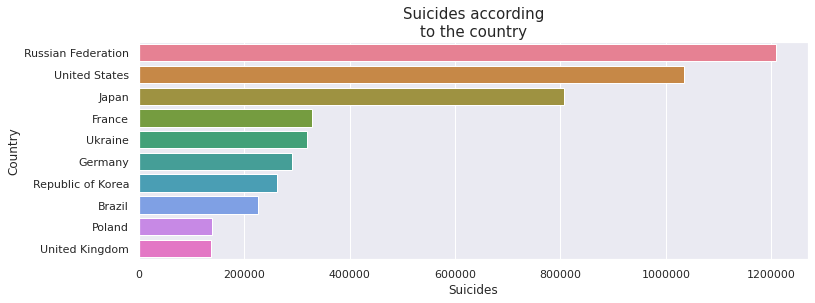

In [ ]:
#Grouping the data by country
gp_cnt_data = clean_data.groupby('country', as_index=False).sum()
top_ten = gp_cnt_data.nlargest(10, 'suicides_no').sort_values('suicides_no', ascending=False)

#Plotting the number of suicides according to the countries
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='suicides_no', y='country', palette='husl', data=top_ten, ax=ax)
plt.xlabel('Suicides')
plt.ylabel('Country')
plt.title('Suicides according\nto the country', size=15)
ax.ticklabel_format(style='plain', axis='x')
plt.show()

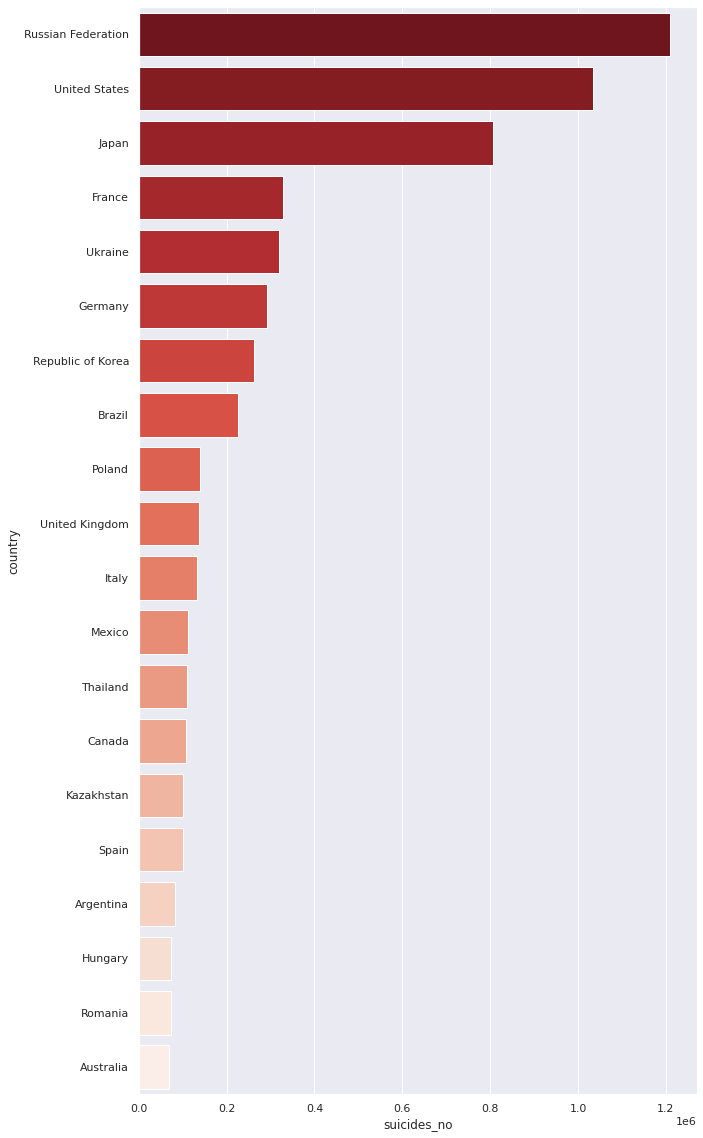

In [ ]:
data = raw_data['suicides_no'].groupby(raw_data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,20))
ax = sns.barplot(data.head(20), data.head(20).index, palette='Reds_r')

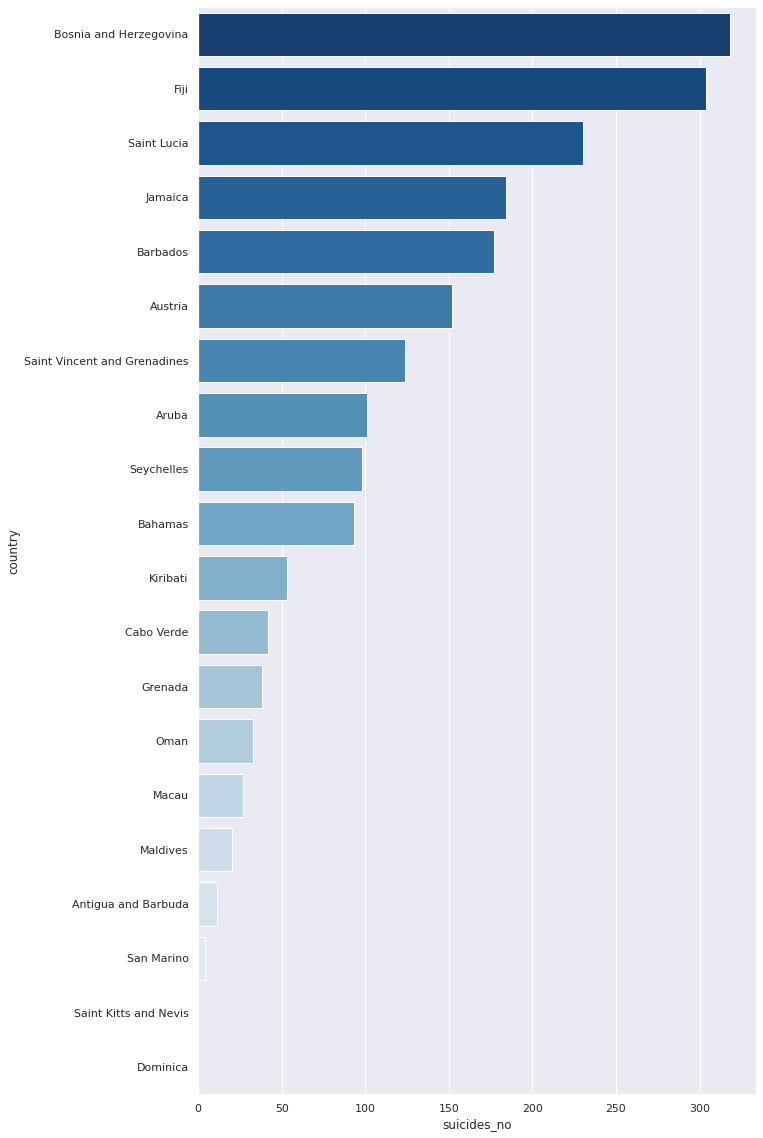

In [ ]:
data = raw_data['suicides_no'].groupby(raw_data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(10,20))
ax = sns.barplot(data.tail(20),data.tail(20).index,palette='Blues_r')

Observation:

- The countries that have the highest number of suicides from 1985 untill 2016 are:
    1. Russia
    2. USA
    3. Japan
    
    The lowest number of suicides is in San Marino
    
Let's check if we can determine which generation has the highest suicide rates. ;

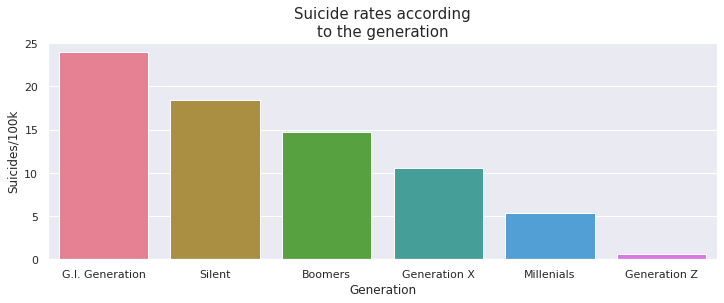

In [ ]:
#Grouping the data by generations
gp_gen_data = clean_data.groupby('generation', as_index=False).mean()

#Plotting the suicide rates according to the generations
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='generation', y='suicides/100k pop', palette='husl', data=gp_gen_data, ax=ax,
            order=['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'])
plt.xlabel('Generation')
plt.ylabel('Suicides/100k')
plt.title('Suicide rates according\nto the generation', size=15)
plt.show()

Observation:

- As we can see, the G.I. Generation or the Greatest Generation (the generation who lived during the WWII) has the highest suicide rate with almost 25 suicides per 100,000 person. This is a very big number compared to younger generations, this might be due to the fact that this generation suffered a lot during the WWII, many of them lost their loved ones and experienced different traumatic events. The suicide rates decrease from a generation to another, where Generation Z has the lowest suicide rates with 1 suicide per 100,000 person. Let's check the suicide rates according to the age categories.

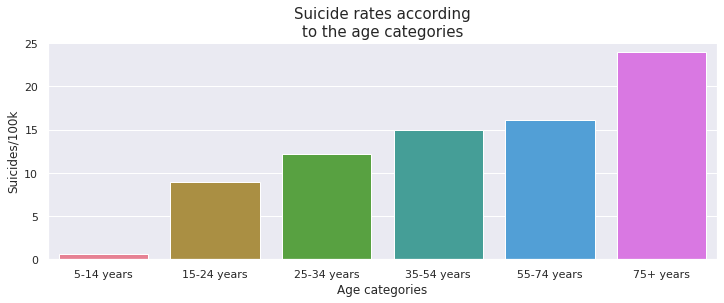

In [ ]:
#Grouping the data by age
gp_age_data = clean_data.groupby('age', as_index=False).mean()

#Plotting the suicide rates according to the age categories
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='age', y='suicides/100k pop', palette='husl', data=gp_age_data, ax=ax,
           order=['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'])
plt.xlabel('Age categories')
plt.ylabel('Suicides/100k')
plt.title('Suicide rates according\nto the age categories', size=15)
plt.show()

Observation:

- We can see that as the person gets older it tends to be more suicidal. This could be explained by the fact that important life changes that happen as we get older may cause feelings of uneasiness, stress, and sadness. But this might be due to the fact that old people (75+ years) belong to the G.I. Generation which already has the highest suicide rates. To further explore this we must check the number of people that commited suicide within each age category with respect to their generation. This way we can find out the distribution of ages of suicidal people within each generation. This will help us to identify if suicide is due to the age factor or to the generation.

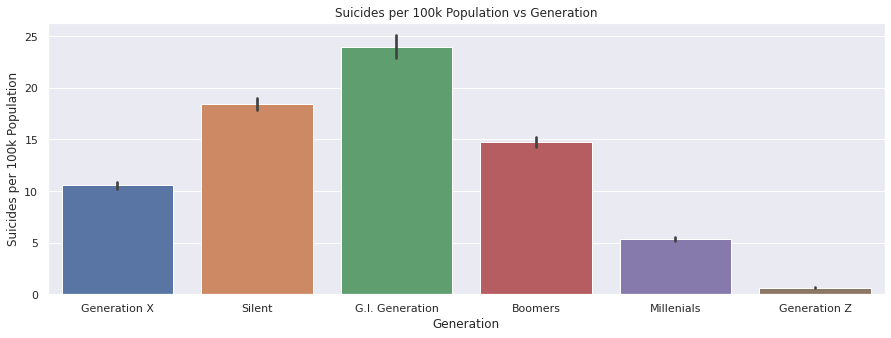

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=raw_data['generation'],y=raw_data['suicides/100k pop'])
plt.title('Suicides per 100k Population vs Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.show()

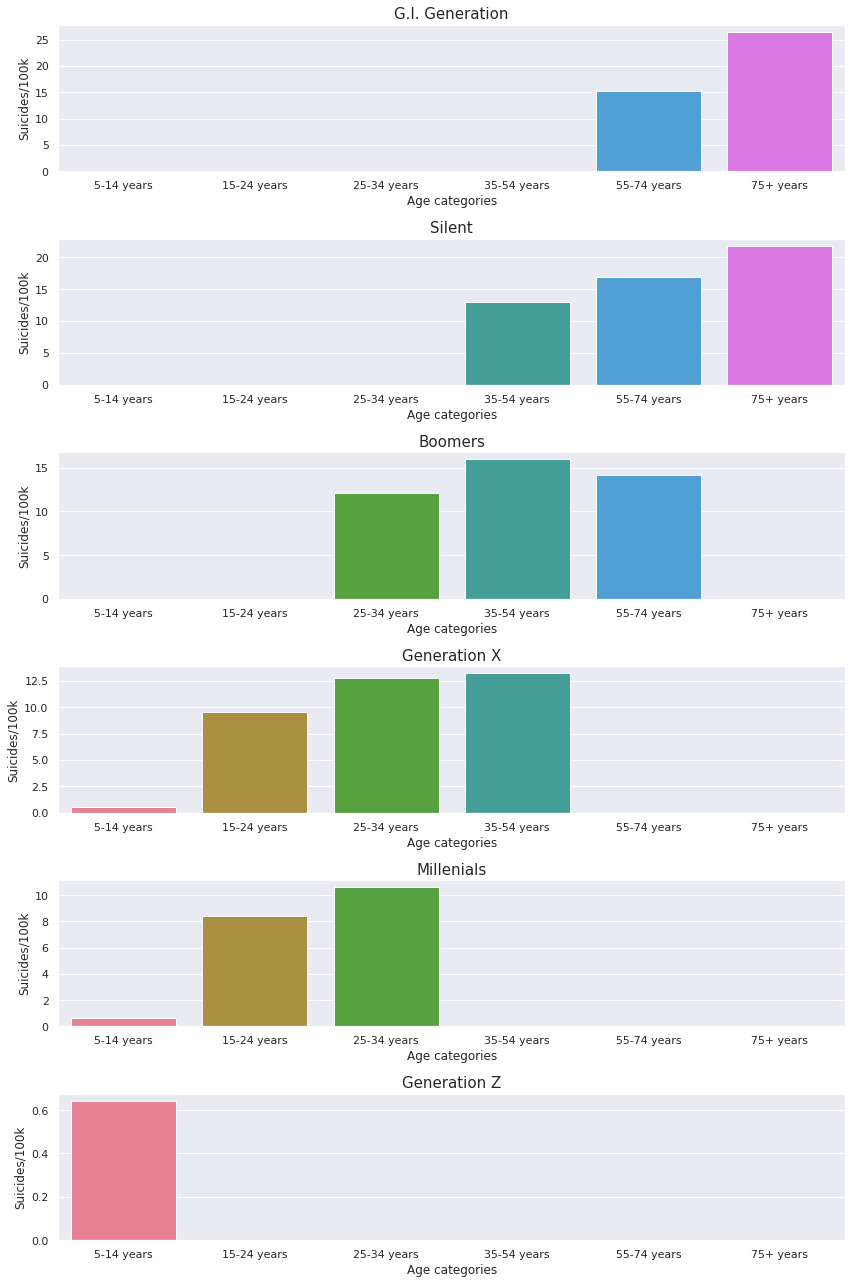

In [ ]:
#Grouping our data by generation and age
gp_gen_age_data = clean_data.groupby(['generation', 'age'], as_index=False).mean()

#Making a list containing all the gens
gens = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

#Creating the axis of the plots
plt.figure(figsize=(12,18))
ax1 = plt.subplot2grid((6,1),(0,0))
ax2 = plt.subplot2grid((6,1),(1,0))
ax3 = plt.subplot2grid((6,1),(2,0))
ax4 = plt.subplot2grid((6,1),(3,0))
ax5 = plt.subplot2grid((6,1),(4,0))
ax6 = plt.subplot2grid((6,1),(5,0))

#Making a list containing all the axes
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

#Making a for loop to plot the needed plots
for gen, ax in zip(gens, axes):
    sns.barplot(x='age', y='suicides/100k pop', palette='husl',
                data=gp_gen_age_data[gp_gen_age_data['generation'] == gen],
                ax=ax, order=['5-14 years', '15-24 years', '25-34 years', '35-54 years',
                          '55-74 years', '75+ years'])
    ax.set_xlabel('Age categories')
    ax.set_ylabel('Suicides/100k')
    ax.set_title(gen, size=15)
plt.tight_layout()

Observation:

- From the plot above we can see that unfortunatly, we don't have every age category for each generation. This is due to the fact the data collection started from around the year 1985, that means that:

    1. people who belong to the G.I. Generation at the year of 1985, will be already 55+ years, so we won't have any people from this generation who belong to younger age category who commited suicide.
    2. equivalently, we won't have any 25-34 years (or younger) people who belong to the Silent Generation and commited suicide because this generation in 1985 were at least 35 years old.
    3. The same goes for younger generations, we might have the young age categories but since the data collection stopped at around 2015 or so, we won't be seeing any boomers older than 75, or millenials older than 35 years old.
    
Due to these reasons, we can't check if the elevated suicide rates are due to the generation or to the age factor. Let's see if the economy of a country has any effect on suicide rates.

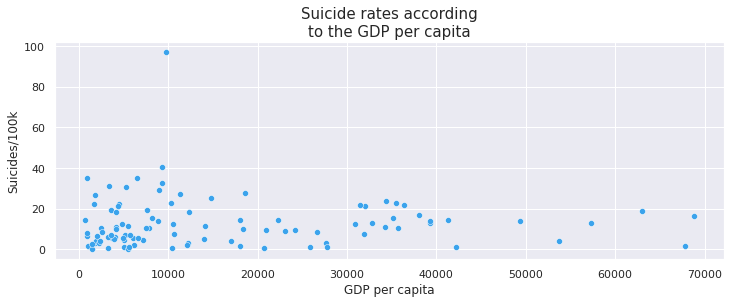

In [ ]:
#Grouping the data by country
gp_cnt_data = clean_data.groupby('country', as_index=False).mean()

#Plotting the suicide rates according to the generations
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', color=sns.husl_palette(6)[4], data=gp_cnt_data, ax=ax)
plt.xlabel('GDP per capita')
plt.ylabel('Suicides/100k')
plt.title('Suicide rates according\nto the GDP per capita', size=15)
plt.show()

Observation:

- From the scatterplot above we can't really see a relation between the suicide rates and the GDP per capita, let's present the data in a diffrent way maybe this will help us to detect a pattern. We're going to split the data we have into bins. This way we'll present the different GDP per capita categories and each category will have it's corresponding suicide rate.  

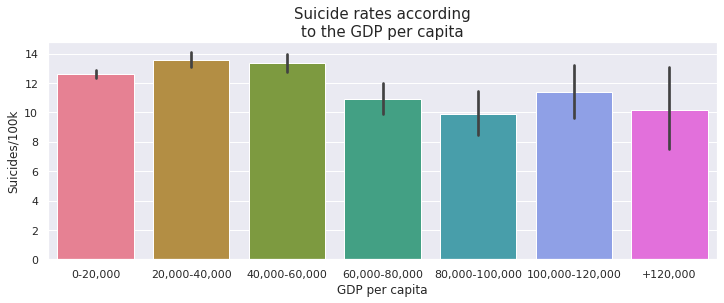

In [ ]:
#Making bins and labels for the gdp_per_capita feature
bins = list(range(0, 160000, 20000))
labels = ['0-20,000', '20,000-40,000', '40,000-60,000', '60,000-80,000', '80,000-100,000', '100,000-120,000', '+120,000']
clean_data['gdp_per_capita_bins'] = pd.cut(clean_data['gdp_per_capita ($)'], bins=bins, labels=labels)

#Plotting the suicide rates according to the gbp per capita bins
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(x='gdp_per_capita_bins', y='suicides/100k pop', palette='husl', data=clean_data, ax=ax)
plt.xlabel('GDP per capita')
plt.ylabel('Suicides/100k')
plt.title('Suicide rates according\nto the GDP per capita', size=15)
plt.show()

Observation:

- Even after transformation we can't detect a clear pattern from our data. All the GDP per capita values give a suicide rate between 10 and 13 suicides per 100k person. If we could say something about the data we have, we would say that the GDP doesn't have any effect on the suicide rates.  



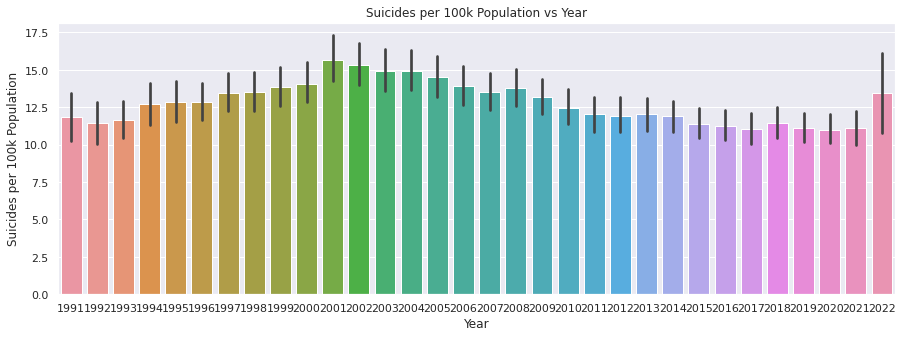

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=raw_data['year'],y=raw_data['suicides/100k pop'])
plt.title('Suicides per 100k Population vs Year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.show()

## ***Numeric Variables Correlated with Suicide***

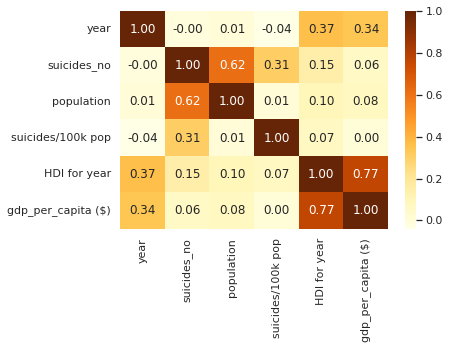

In [ ]:
sns.heatmap(raw_data.corr(), annot=True, cmap='YlOrBr', fmt='.2f');

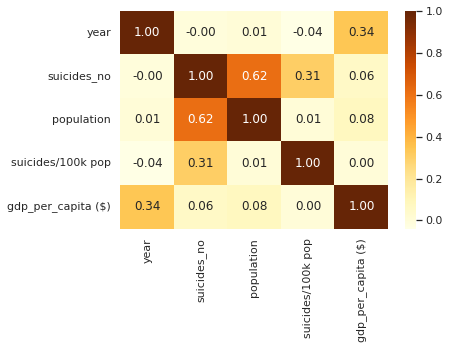

In [ ]:
sns.heatmap(clean_data.corr(), annot=True, cmap='YlOrBr', fmt='.2f');

Observation:

    There doesn't seem to be strong relationship between numerical variables and suicide. The correlation coefficient between population and suicides_no is quite high (0.62), but actually there is no "real" correlation (coefficient = 0.01) after normalizing the number of suicides by population.


## ***Modelling and predictions***:


- In this part of the notebook, we will try to fit two diffrent models to our data. First we are going to try the linear regression model. Second we will use the decision tree regressor. We will use the SkLearn library for both algorithms and for data preprocessing too. We will first start by selecting the independent features and storing them in a variable named X, and our independent feature in a variable named y.

In [ ]:
#Selecting the dependent and independent features
X = clean_data[['country', 'sex', 'population', 'age', 'gdp_per_capita ($)', 'generation']]
y = clean_data['suicides/100k pop']

- As we know, the linear regression algorithm doesn't work with categorical features. To deal with this problem we'll need to transform our categorical data to dummy variables. For this we will use the Pandas method get_dummies.

In [ ]:
#Transforming the categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

- After dealing with categorical variables, we can move to scaling our data in order to normalise the data within a particular range.Also, scaling helps in speeding up the calculations in an algorithm.

In [ ]:
#Importing needed package for scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaling our data
sc = StandardScaler()
X[['population', 'gdp_per_capita ($)']] = sc.fit_transform(X[['population', 'gdp_per_capita ($)']])

In [ ]:
#Importing needed package for splitting the dataset
from sklearn.model_selection import train_test_split

- Finally, we'll split our data into two sets: training and testing. The sizes will be 80% for the training data and 20% for testing data.

In [ ]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## Linear Regression:

In [ ]:
#Importing the Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [ ]:
#Initializing our Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Predicting the test values
lr_y_pred = lr.predict(X_test)

In [ ]:
#Predicting the accuracy of Linear Regression
print('Training Accuracy :', lr.score(X_train, y_train))
print('Testing Accuracy :', lr.score(X_test, y_test))

Training Accuracy : 0.5236731515943938
Testing Accuracy : 0.5018176447912365


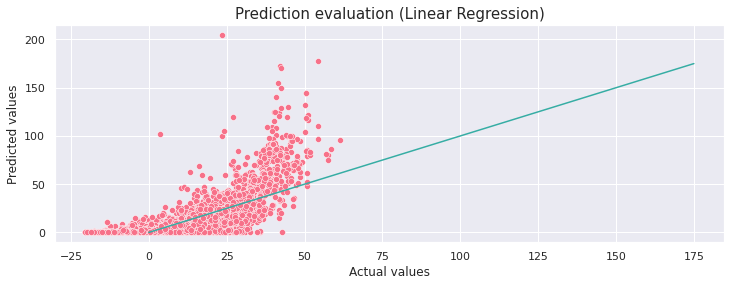

In [ ]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(lr_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

- Our model doesn't seem to be doing a good job, this might be due to fact that the features we selected aren't good enough, or it might be due the fact that the data we have isn't linear so a similar model won't be any good to estimate the values. Maybe the decision tree will perfom better, let's check it out.

# Decision Tree Regressor:

In [ ]:
#Importing the Decision Tree algorithm
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Initializing our Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Predicting the test values
dt_y_pred = dt.predict(X_test)

In [ ]:
y_test

15506     4.00
2419      0.00
8502     20.91
7485      9.74
19120    17.90
         ...  
15928     0.00
12583     0.18
19049     2.42
9767      3.70
8265      2.37
Name: suicides/100k pop, Length: 5564, dtype: float64

In [ ]:
dt_y_pred

array([ 3.99,  0.  , 29.58, ...,  2.41,  3.31,  1.13])

In [ ]:
#Predicting the accuracy of Decision Tree Regressor
print('Training Accuracy :', dt.score(X_train, y_train))
print('Testing Accuracy :', dt.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8478479707018591


- Finally we will compare our predictions to the real ones by plotting the on the same figure.

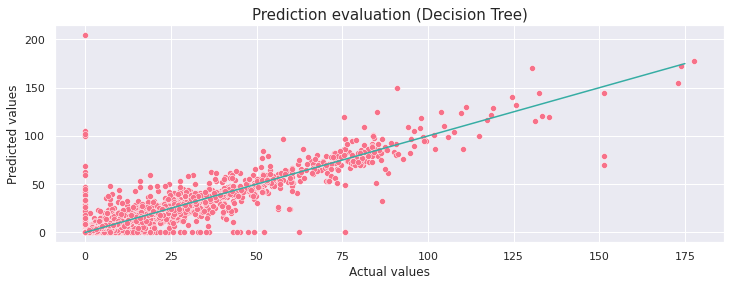

In [ ]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(dt_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Decision Tree)', size=15)
plt.show()

- The predictions are visibly much better than the one that the linear regression produced. Still we can't say that model produced good results. The decision tree needs further tuning in order to produce better results. Our data might also need more transformation or we might need more features in order to produce more accurate results.

# Random Forest Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfr_y_pred = rfr.predict(X_test)

In [ ]:
y_test

15506     4.00
2419      0.00
8502     20.91
7485      9.74
19120    17.90
         ...  
15928     0.00
12583     0.18
19049     2.42
9767      3.70
8265      2.37
Name: suicides/100k pop, Length: 5564, dtype: float64

In [ ]:
rfr_y_pred

array([ 3.3938,  0.8759, 30.8374, ...,  2.2136,  3.4498,  1.707 ])

In [ ]:
#Predicting the accuracy of Decision Tree Regressor
print('Training Accuracy :', rfr.score(X_train, y_train))
print('Testing Accuracy :', rfr.score(X_test, y_test))

Training Accuracy : 0.9843298061585449
Testing Accuracy : 0.8847953967494615


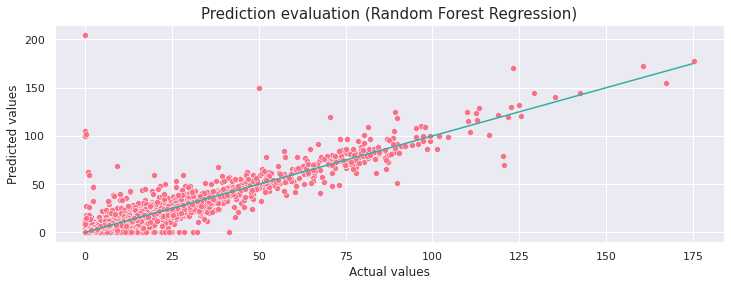

In [ ]:
#Plotting the results
fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(rfr_y_pred, y_test, ax=ax, color=sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175], color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Random Forest Regression)', size=15)
plt.show()

# XGB Regression

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBRegressor(objective = 'reg:squarederror' , learning_rate = 0.1,max_depth = 10, n_estimators = 100)

In [ ]:
xg.fit(X_train, y_train)

XGBRegressor(max_depth=10, objective='reg:squarederror')

In [ ]:
xg.score(X_train,y_train)

0.910904681331729

In [ ]:
xg_y_pred_XG = xg.predict(X_test)

In [ ]:
print('Training Accuracy :',xg.score(X_train,y_train))
print('Testing Accuracy :',xg.score(X_test,y_test))

Training Accuracy : 0.910904681331729
Testing Accuracy : 0.8446577847515024
